In [42]:
import pandas as pd
df=pd.read_csv("Health.csv")
print(df)
x=df.iloc[:,:3].values
y=df.iloc[:,3].values


  Ethnicity  Height (CM)  Weight (Kg) Will survive till 70
0     White        186.0         90.0                  Yes
1   African        185.0         98.0                   No
2     Asian        175.0         80.0                   No
3     White        180.0         88.0                  Yes
4     Asian        178.0          NaN                   No
5     Asian        172.0         72.0                  Yes
6   African        178.0         75.0                   No
7     White          NaN         89.0                  Yes
8   African        186.0         90.0                  Yes


In [43]:
print(x)
print(y)

[['White' 186.0 90.0]
 ['African' 185.0 98.0]
 ['Asian' 175.0 80.0]
 ['White' 180.0 88.0]
 ['Asian' 178.0 nan]
 ['Asian' 172.0 72.0]
 ['African' 178.0 75.0]
 ['White' nan 89.0]
 ['African' 186.0 90.0]]
['Yes' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'Yes' 'Yes']


In [44]:
from sklearn.preprocessing import LabelEncoder
lb_enco=LabelEncoder()
x[:,0]=lb_enco.fit_transform(x[:,0])
x

array([[2, 186.0, 90.0],
       [0, 185.0, 98.0],
       [1, 175.0, 80.0],
       [2, 180.0, 88.0],
       [1, 178.0, nan],
       [1, 172.0, 72.0],
       [0, 178.0, 75.0],
       [2, nan, 89.0],
       [0, 186.0, 90.0]], dtype=object)

In [45]:
y=lb_enco.fit_transform(y)
y

array([1, 0, 0, 1, 0, 1, 0, 1, 1], dtype=int64)

In [46]:
from sklearn.preprocessing import Imputer
missingValueImputer = Imputer(missing_values='NaN',strategy ='median',axis=0)
missingValueImputer = missingValueImputer.fit(x[:,1:3])
x[:,1:3]=missingValueImputer.transform(x[:,1:3])
x

array([[2, 186.0, 90.0],
       [0, 185.0, 98.0],
       [1, 175.0, 80.0],
       [2, 180.0, 88.0],
       [1, 178.0, 88.5],
       [1, 172.0, 72.0],
       [0, 178.0, 75.0],
       [2, 179.0, 89.0],
       [0, 186.0, 90.0]], dtype=object)

In [47]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3) # always write components less than equal to features
pca.fit_transform(x) # we never do pca on target variable and y is our target variable.
print(pca.explained_variance_ratio_)

[0.91986934 0.07291972 0.00721095]


In [48]:
df1=pd.read_csv("position_salaries.csv")
df1

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [49]:
x=df1.iloc[:,0:2].values
y=df1.iloc[:,2].values
print(x)
print(y)

[['Business Analyst' 1]
 ['Junior Consultant' 2]
 ['Senior Consultant' 3]
 ['Manager' 4]
 ['Country Manager' 5]
 ['Region Manager' 6]
 ['Partner' 7]
 ['Senior Partner' 8]
 ['C-level' 9]
 ['CEO' 10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [50]:
x[:,0]=lb_enco.fit_transform(x[:,0])
x

array([[0, 1],
       [4, 2],
       [8, 3],
       [5, 4],
       [3, 5],
       [7, 6],
       [6, 7],
       [9, 8],
       [1, 9],
       [2, 10]], dtype=object)

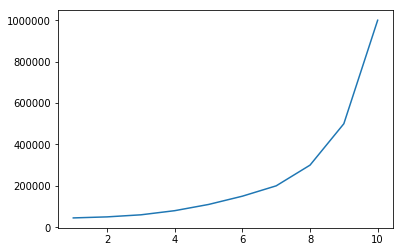

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=object)

In [51]:
import matplotlib.pyplot as plt
plt.plot(x[:,1],y)
plt.show()
x[:,1]

In [52]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error
lin_reg=LinearRegression()
from sklearn.cross_validation import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .25)
lin_reg.fit(x_train,y_train)
predict_val=lin_reg.predict(x_test)

In [53]:
print(np.sqrt(mean_squared_error(y_test,predict_val)))

294131.33955160464


In [54]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=4)
poly_x=poly_reg.fit_transform(x)
poly_reg.fit(poly_x,y)
lin_reg.fit(poly_x,y)
predict_val=lin_reg.predict(poly_x)

In [55]:
print(np.sqrt(mean_squared_error(y,predict_val)))

1.364945214016092e-09
